In [ ]:
# Python version
from platform import python_version
print(f'Python version used in this notebook: {python_version()}')

Python version used in this notebook: 3.7.12


# **Análise do Comportamento de Compra de Consumidores**

Análise dos dados de compras de um web site. Os dados estão no formato JSON e disponíveis junto com este notebook.

No site, cada usuário efetua login usando sua conta pessoal e pode adquirir produtos à medida que navega pela lista de produtos oferecidos. Cada produto possui um valor de venda. Dados de idade e sexo de cada usuário foram coletados e estão fornecidos no arquivo JSON.

Esse trabalho visa realizar uma **análise de comportamento de compra** dos consumidores, um tipo de atividade comum realizado por Cientistas de Dados e o resultado deste trabalho pode ser usado, por exemplo, para alimentar um modelo de Machine Learning e fazer previsões sobre comportamentos futuros.

Os itens a serem analisados são os seguintes:

<b>Contagem de Consumidores</b>

* Número total de consumidores

**Análise Geral de Compras**

* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total

**Informações Demográficas Por Gênero**

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados

**Análise de Compras Por Gênero**

* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária

**Identificar os 5 principais compradores pelo valor total de compra, listando em uma tabela:**

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares

**Identificar os 5 itens mais populares por contagem de compras, listando em uma tabela:**

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos

**Identificar os 5 itens mais lucrativos pelo valor total de compra, listando em uma tabela:**

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra

**Observações:**
Alguma seções podem depender dos resultados obtidos nas seções anteriores

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [ ]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.1.5
1.19.5
0.11.2


In [ ]:
# Carrega o arquivo
load_file = "/content/drive/MyDrive/DATA/G_Colab/dados_compras.json"
purchase_file = pd.read_json(load_file, orient = "records")
purchase_file.head() # display

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


# Informações Sobre os Consumidores

In [ ]:
# Contagem de consumidores
num_total = len(set(purchase_file['Login']))
print(f"Número total de consumidores: {num_total}")

Número total de consumidores: 573


In [ ]:
# Informações gerais de cada consumidor

# Adicionando as colunas referentes ao login, ao sexo e à quantidade de compras por consumidor
login = purchase_file[["Login", "Sexo"]].value_counts(ascending=True).to_frame()
login = login.rename_axis(index={'Login': 'Login', 'Sexo':'Sexo'}, axis='columns').reset_index()
login['Quantidade de compras'] = login[0]
login = login.drop([0], axis=1).sort_values(by='Login')

# Adicionando a coluna referente ao valor total gasto por consumidor
login_value = purchase_file[['Login', 'Valor']]
login_value = login_value.groupby('Login').sum().reset_index()

# Adicionando a coluna referente à idade de cada consumidor
ages = purchase_file[['Login', 'Idade']].drop_duplicates(subset='Login')

login = login.join(login_value.set_index('Login'), on='Login')
login = login.join(ages.set_index('Login'), on = 'Login')

login = login.iloc[:, [0, 1, 4, 2, 3]] # reorganizando ordem das colunas
login

# Obs: A coluna 'valor' é referente ao valor total gasto em compras pelo consumidor

,Login,Sexo,Idade,Quantidade de compras,Valor
0,Adairialis76,Masculino,20,1,2.46
548,Aduephos78,Masculino,37,3,6.70
545,Aeduera68,Masculino,26,3,5.80
320,Aela49,Masculino,25,1,2.46
319,Aela59,Masculino,23,1,1.27
...,...,...,...,...,...
152,Yasurra52,Feminino,22,1,3.14
443,Yathecal72,Masculino,32,2,7.77
151,Yathecal82,Masculino,23,1,2.41
424,Zhisrisu83,Masculino,17,2,2.46


Obs: omitiu-se a célula de limpeza de dados pois não foi necessária

In [ ]:
# Média da idade dos consumidores:
mean_age = np.mean(log['Idade'])

# Mediana da idade dos consumidores:
median_age = np.median(log['Idade'])

print(f"Média de idade dos consumidores: {round(mean_age, 1)}")
print(f"Mediana de idade dos consumidores: {median_age}")

Média de idade dos consumidores: 22.6
Mediana de idade dos consumidores: 22.0


In [ ]:
# Medindo a popularidade de acordo com a quantidade de compras realizadas pelo consumidor (top 5 somente)
popular_consumers = purchase_file[['Login','Idade','Sexo']].value_counts().to_frame()
popular_consumers = popular_consumers.reset_index().rename(columns={0:'Compras'}).head(5)
popular_consumers

,Login,Idade,Sexo,Compras
0,Undirrala66,29,Masculino,5
1,Hailaphos89,20,Masculino,4
2,Mindimnya67,39,Feminino,4
3,Qarwen67,11,Masculino,4
4,Sondastan54,31,Masculino,4


# Análise Geral de Compras

* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total

Contagem de itens

In [ ]:
# Contagem de itens
count = purchase_file["Item ID"].value_counts(ascending=True)
count = count.rename_axis('Itens').reset_index(name = 'Quantidade')

Número de itens exclusivos

In [ ]:
# itens que foram comprados uma única vez
#exclusive_itens = count[count['Quantidade'] == 1]['Itens'].tolist()

# Número de itens exclusivos
print(f"Número de itens exclusivos: {len(purchase_file['Item ID'].unique())}")

Número de itens exclusivos: 183


Preço médio de compra

In [ ]:
# Preço médio de compra
mean_price = np.mean(purchase_file['Valor'])
print(f"Preço médio de compra: {round(mean_price, 2)}$")

Preço médio de compra: 2.93$


Número Total de Compras

In [ ]:
# Número Total de Compras
print(f"Número total de compras: {len(purchase_file)}")

Número total de compras: 780


Rendimento Total

In [ ]:
# Rendimento Total
total_income = np.sum(purchase_file['Valor'])
print(f"Rendimento Total: {round(total_income, 2)}$")

Rendimento Total: 2286.33$


# Informações Demográficas Por Gênero

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados

Porcentagens

In [ ]:
purchase_temp = purchase_file.drop_duplicates(subset='Login')

gender_consumers = purchase_temp['Sexo'].value_counts().reset_index(name='Sexo').rename(columns={'index': 'Sexo','Sexo': 'Contagem'})
gender_consumers['%'] = round((gender_consumers['Contagem']/np.sum(gender_consumers['Contagem'])) * 100, 2)

# Data Munging
gender_consumers["%"] = gender_consumers["%"].map("{:,.1f}%".format)

gender_consumers

,Sexo,Contagem,%
0,Masculino,465,81.2%
1,Feminino,100,17.4%
2,Outro / Não Divulgado,8,1.4%


In [ ]:
# Porcentagens

n = np.sum(gender_consumers['Contagem'])

# Porcentagem de compradores do sexo masculino
male_percentage = gender_consumers['%'][0]
print(f"Porcentagem de compradores do sexo masculino: {male_percentage}")

# Porcentagem de compradores do sexo feminino
female_percentage = gender_consumers['%'][1]
print(f"Porcentagem de compradores feminino: {female_percentage}")

# Porcentagem de outros / não divulgados
others_percentage = gender_consumers['%'][2]
print(f"Porcentagem de outros / não divulgados: {others_percentage}")


Porcentagem de compradores do sexo masculino: 81.2%
Porcentagem de compradores feminino: 17.4%
Porcentagem de outros / não divulgados: 1.4%


Informação gráfica

In [ ]:
# Ajusta os labels (para gráfico)
labels = [str(gender_consumers['Sexo'][i]) + ' ' + '[' + gender_consumers['%'][i] +']' for i in gender_consumers.index]

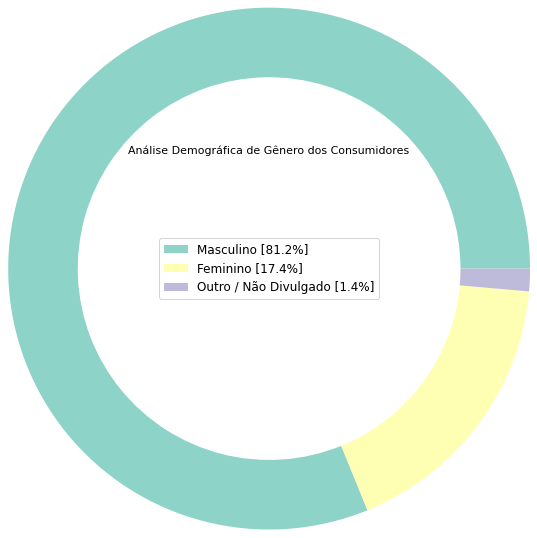

In [ ]:
# Plot

# Mapa de cores
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Cria a figura
figure = plt.figure()

# Pie Plot
plt.pie(gender_consumers['Contagem'], labeldistance = 1, radius=3, colors=cs, wedgeprops= dict(width = .8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Análise Demográfica de Gênero dos Consumidores", loc = "center", fontdict = {'fontsize':11, 'fontweight':20})
plt.show()


# Análise de Compras por Gênero

* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras por faixa etária


Número de compras

In [ ]:
# Número de compras por gênero 
quantity = login["Quantidade de compras"].groupby(login['Sexo'])
quantity = quantity.sum().to_frame().reset_index()
quantity.sort_values(by='Quantidade de compras', ascending=False)

,Sexo,Quantidade de compras
1,Masculino,633
0,Feminino,136
2,Outro / Não Divulgado,11


Valor Total de Compra

In [ ]:
# Valor total de compra por gênero 
login['Valor'].groupby(login['Sexo']).sum().reset_index().rename(columns={'Valor':'Valor Total'})

,Sexo,Valor Total
0,Feminino,382.91
1,Masculino,1867.68
2,Outro / Não Divulgado,35.74


Preço médio de compra

In [ ]:
# Preço médio de compra
mean_shop_cost = purchase_file['Valor'].groupby(purchase_file['Sexo']).mean().reset_index().rename(columns={'Valor':'Preço médio'})
mean_shop_cost['Preço médio'] = round(mean_shop_cost['Preço médio'], 2)
mean_shop_cost

,Sexo,Preço médio
0,Feminino,2.82
1,Masculino,2.95
2,Outro / Não Divulgado,3.25


Compras por faixa etária

In [ ]:
# Compras por faixa etária

min_age = min(login['Idade']) # menor idade encontrada na base de dados de consumidores
max_age = max(login['Idade']) # maior idade encontrada na base de dados de consumidores

age_group_range = 5 # tamanho do intervalo de faixa etária

age_shopping = {} # armazena quantidade de compras por faixa etária

shop_gender_per_age_group = {} # armazena os valores de compras por sexo por faixa etária

#gender_per_age_group = {} # armazena a quantidade de um determinado sexo por faixa etária 

n = min_age

# Calculando a quantidade de compras por faixa etária
for i in range(int(max_age/age_group_range)):
  if n >= max_age:
    break

  quantity_shopping = login.loc[(login['Idade'] >= n) & (login['Idade'] < (n+age_group_range)), 'Quantidade de compras'].sum() # calculando a quantidade de compras por faixa etária
  
  #quantity_gender = login.loc[(login['Idade'] >= n) & (login['Idade'] < (n+age_group_range)), ['Sexo']] # quantidade de um determinado sexo por faixa etária
  quantity_shopping_gender = purchase_file.loc[(purchase_file['Idade'] >= n) & (purchase_file['Idade'] < (n+age_group_range)), ['Sexo']] # compras por sexo por faixa etária
  
  age_shopping[f'{n}-{n+age_group_range}'] = quantity_shopping

  #gender_per_age_group[f'{n}-{n+age_group_range}'] = quantity_gender.value_counts().tolist()
  shop_gender_per_age_group[f'{n}-{n+age_group_range}'] = quantity_shopping_gender.value_counts().tolist()

  n += age_group_range

In [ ]:
#gender_values = list(gender_per_age_group.values()) # lista das quantidades de sexo por faixa etária (ordem: masculino, feminino, outros)
gender_shopping_values = list(shop_gender_per_age_group.values())
#male = [] # quantidade de consumidores do sexo masculino por faixa etária
male_shopping = []  
#female = [] # quantidade de consumidores do sexo feminino por faixa etária
female_shopping = []
#outhers = [] # quantidade de consumidores de sexo não divulgado ou outros por faixa etária
others_shopping = []
for i in range(len(gender_shopping_values)):
  try:
    #male.append(gender_values[i][0])
    male_shopping.append(gender_shopping_values[i][0])
  except:
    #male.append(0)
    male_shopping.append(0)
  try:
    #female.append(gender_values[i][1])
    female_shopping.append(gender_shopping_values[i][1])
  except:
    #female.append(0)
    female_shopping.append(0)
  try:
    #others.append(gender_values[i][2])
    others_shopping.append(gender_shopping_values[i][2])
  except:
    #others.append(0)
    others_shopping.append(0)

In [ ]:
# Formação do dataframe
shop_age_frame = pd.DataFrame()
shop_age_frame['Faixa etaria'] = age_shopping.keys()
shop_age_frame['Quantidade de compras'] = age_shopping.values()
#shop_age_frame['Masculino'] = male
#shop_age_frame['Feminino'] = female
#shop_age_frame['Outros / Não Divulgados'] = outhers
shop_age_frame['Masculino'] = male_shopping
shop_age_frame['Feminino'] = female_shopping
shop_age_frame['Outros / Não Divulgados'] = others_shopping
shop_age_frame

,Faixa etaria,Quantidade de compras,Masculino,Feminino,Outros / Não Divulgados
0,7-12,41,31,10,0
1,12-17,92,77,14,1
2,17-22,204,167,36,1
3,22-27,275,226,47,2
4,27-32,79,65,12,2
5,32-37,49,38,6,5
6,37-42,37,26,11,0
7,42-47,3,3,0,0


#Identificando os 5 principais compradores pelo valor total de compra:

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares

In [ ]:
top_5 = login.sort_values(by='Valor', ascending=False).head(5)
top_5 = top_5.reset_index().drop(columns='index', axis=1)
top_5

,Login,Sexo,Idade,Quantidade de compras,Valor
0,Undirrala66,Masculino,29,5,17.06
1,Saedue76,Masculino,25,4,13.56
2,Mindimnya67,Feminino,39,4,12.74
3,Haellysu29,Masculino,21,3,12.73
4,Eoda93,Masculino,22,3,11.58


In [ ]:
# Ranque geral de itens mais populares
general_rank = purchase_file['Nome do Item'].value_counts()
general_rank = general_rank.reset_index().rename(columns={'index':'Nome do Item', 'Nome do Item':'Contagem'})
general_rank = general_rank.head(5)
general_rank

,Nome do Item,Contagem
0,Final Critic,14
1,"Betrayal, Whisper of Grieving Widows",11
2,Arcane Gem,11
3,Stormcaller,10
4,Trickster,9


In [ ]:
top_5_buy = purchase_file[purchase_file['Login'].isin(top_5['Login'])]

In [ ]:
# Ranque dos top_5 de itens mais populares
top_5_rank = top_5_buy['Nome do Item'].value_counts()
top_5_rank = top_5_rank.reset_index().rename(columns={'index':'Nome do Item', 'Nome do Item':'Contagem'})
top_5_rank = top_5_rank.head(5)
top_5_rank

,Nome do Item,Contagem
0,Striker,2
1,Blood Infused Guardian,1
2,Stormfury Longsword,1
3,Thunderfury Scimitar,1
4,"Torchlight, Bond of Storms",1


#Identificando os 5 itens mais populares por contagem de compras:

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos

In [ ]:
# Tabela dos top 5 itens mais populares por contagem de compras
nova = purchase_file[['Nome do Item', 'Item ID','Valor']].value_counts() 
nova = nova.to_frame().reset_index().rename(columns={0:'Compras'})
nova['Total'] = nova['Valor']*nova['Compras'] # valor total de compras por item
nova.drop_duplicates(subset='Item ID')

,Nome do Item,Item ID,Valor,Compras,Total
0,Arcane Gem,84,2.23,11,24.53
1,"Betrayal, Whisper of Grieving Widows",39,2.35,11,25.85
2,Retribution Axe,34,4.14,9,37.26
3,Woeful Adamantite Claymore,175,1.24,9,11.16
4,Serenity,13,1.49,9,13.41
...,...,...,...,...,...
179,Foul Edge,43,2.38,1,2.38
180,Phantomlight,3,1.79,1,1.79
181,Ghastly Adamantite Protector,136,3.30,1,3.30
182,"Hellreaver, Heirloom of Inception",147,3.59,1,3.59


In [ ]:
# Itens mais lucrativos neste top 5
nova.sort_values(by='Total', ascending=False).head(5)

,Nome do Item,Item ID,Valor,Compras,Total
2,Retribution Axe,34,4.14,9,37.26
1,"Betrayal, Whisper of Grieving Widows",39,2.35,11,25.85
0,Arcane Gem,84,2.23,11,24.53
4,Serenity,13,1.49,9,13.41
3,Woeful Adamantite Claymore,175,1.24,9,11.16


#Identificando os 5 itens mais lucrativos pelo valor total de compra:

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra


**Observação**: Um mesmo nome de item pode ter IDs diferentes. Dessa forma, podemos calcular os itens mais lucrativos por IDs ou por nomes de itens. Abaixo foram calculadas das duas maneiras, sendo possível, portanto, observar a diferença entre os resultados.

Itens mais lucrativos por ID do Item:

In [ ]:
# Itens mais lucrativos por Item ID

total_value = purchase_file.groupby(['Item ID']).sum()['Valor'].reset_index().rename(columns={'Valor':'Valor Total de Compra'}) # Valor total de compra por Item
name_n_value = purchase_file[['Nome do Item','Valor', 'Item ID']].drop_duplicates(subset='Item ID').reset_index(drop=True) # Nome e Valor de cada Item por ID (nomes duplicados podem ser encontrados, visto que podem ter IDs diferentes)
purchases_num = purchase_file[['Nome do Item', 'Item ID', 'Valor']].value_counts(subset='Item ID').reset_index().rename(columns={0:'Número de Compras'}) # Número de compras de cada Item (por ID)

# Joining dataframes
purchases_num = purchases_num.set_index('Item ID').join(name_n_value.set_index('Item ID'))
purchases_num = purchases_num.join(total_value.set_index('Item ID')).reset_index()
purchases_num = purchases_num[['Item ID', 'Nome do Item', 'Valor', 'Número de Compras', 'Valor Total de Compra']].sort_values(by='Item ID') # to facilitate visualization, if needed

# top 5
purchases_num.sort_values(by='Valor Total de Compra', ascending=False).head().reset_index(drop=True)

,Item ID,Nome do Item,Valor,Número de Compras,Valor Total de Compra
0,34,Retribution Axe,4.14,9,37.26
1,115,Spectral Diamond Doomblade,4.25,7,29.75
2,32,Orenmir,4.95,6,29.70
3,103,Singed Scalpel,4.87,6,29.22
4,107,"Splitter, Foe Of Subtlety",3.61,8,28.88


Itens mais lucrativos por Nome do Item:

In [ ]:
# Itens mais lucrativos por Nome do Item

# Nome do Item e Valor Total de Compra de cada um
user_total = purchase_file.groupby(["Nome do Item"]).sum()["Valor"].rename("Valor Total de Compra")
user_total = user_total.reset_index().reset_index(drop=True)

# Número de compras de cada item por nome
name_item_num = purchase_file['Nome do Item'].value_counts().reset_index().rename(columns={'index':'Nome do Item', 'Nome do Item':'Número de Compras'})

# Valor de cada item (por nome)
name_item_value = purchase_file[['Nome do Item','Valor']].drop_duplicates(subset='Nome do Item').reset_index(drop=True) # Nome e Valor de cada Item por nome

# Joining dataframes
user_total = user_total.set_index('Nome do Item').join(name_item_num.set_index('Nome do Item')).reset_index()
user_total = user_total[['Nome do Item', 'Número de Compras', 'Valor Total de Compra']]

# Top 5
#display(user_total.sort_values(by='Valor Total de Compra', ascending=False).head().reset_index(drop=True))

In [ ]:
# Valor de cada item (por nome)
name_item_value = purchase_file[['Nome do Item','Valor', 'Item ID']].drop_duplicates(subset=['Nome do Item', 'Valor']).reset_index(drop=True) # Nome e Valor de cada Item por nome
#display(name_item_value)

In [ ]:
# Formação de dicionários

values = {} # guarda os preços do item
ids = {} # guarda os IDs do item

In [ ]:
for i in range(len(name_item_value)):
  name = name_item_value['Nome do Item'][i]
  value = name_item_value['Valor'][i]
  id = name_item_value['Item ID'][i]
  if name not in values.keys():
    values[name] = [value]
    ids[name] = [id]
  if name in values.keys() and value not in values[name]:
    values[name].append(value)
    ids[name].append(id)

In [ ]:
# Funções para formatação da apresentação de dados

# formatação da exibição dos valores
def convert_prices(a):
  '''
  to make use of this function, make sure that you 
  are using valid values (i.e., not 'NaN' values or
  other non-numeric data types)
  '''
  string = f'${round(a[0], 2)}'
  for j in a[1:]:
    string += f', ${round(j, 2)}'
  return string

# formatação da exibição dos IDs
def convert_ids(a):
  '''
  to make use of this function, make sure that you 
  are using valid values (i.e., not 'NaN' values or
  other non-numeric data types)
  '''
  string = f'{round(a[0], 2)}'
  for j in a[1:]:
    string += f', {round(j, 2)}'
  return string

In [ ]:
# Formação de um dataframe

temp = pd.DataFrame()
temp['Nome do Item'] = values.keys()
temp['Valor(es)'] = np.array(list(values.values()), dtype=object)
temp['IDs'] = np.array(list(ids.values()), dtype=object)

# Data munging
temp['Valor(es)'] = temp['Valor(es)'].map(convert_prices)
temp['IDs'] = temp['IDs'].map(convert_ids)

#display(temp)

In [ ]:
# Joining dataframes

user_total = user_total.set_index('Nome do Item').join(temp.set_index('Nome do Item'), on='Nome do Item').reset_index()
user_total = user_total[['Nome do Item', 'IDs', 'Número de Compras', 'Valor(es)', 'Valor Total de Compra']]


In [ ]:
# Visualização (Top 5)

user_total.sort_values(by='Valor Total de Compra', ascending=False).head().reset_index(drop=True)

,Nome do Item,IDs,Número de Compras,Valor(es),Valor Total de Compra
0,Final Critic,"92, 101",14,"$1.36, $4.62",38.60
1,Retribution Axe,34,9,$4.14,37.26
2,Stormcaller,"30, 180",10,"$4.15, $2.78",34.65
3,Spectral Diamond Doomblade,115,7,$4.25,29.75
4,Orenmir,32,6,$4.95,29.70
